# 1. Supervised Learning & Backpropagation




## 1.1 Introduction

Recap of Practical 1:

In our previous practical, we constructed a single hidden layer neural network. We progressed from a single perceptron model to a network with multiple interconnected perceptrons. The focus was on the feedforward pass for the XOR operation.

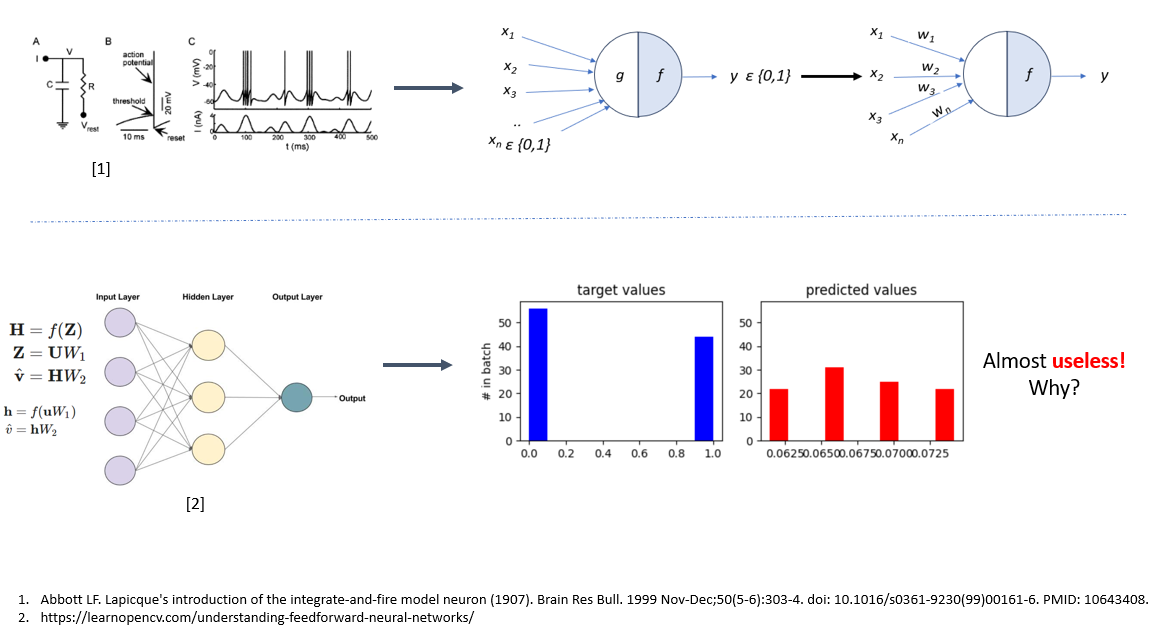

**A Brief Addition: McCullough & Pitts Neuron and the Leaky Integrate & Fire Model:**

LIF model by Lapique (1907) is an early representation of a neuron's electrical behavior, which was more biophysically oriented, and was aiming to capture the essential features of real neuronal behavior. However, the McCullough & Pitts neuron (1943) is typically highlighted as the first computational model emphasizing the logical and computational capabilities of neural networks.

Objectives of Practical 2:

*   To understand the training process, including backpropagation, without relying on machine learning libraries

*   Getting introduced to ML libraries

In [ ]:
# @title Defining the dataset and the neural network (from tutorial 1)

# importing libraries
import numpy as np
import matplotlib.pyplot as plt

#the dataset defined by the logical operator AND
dataset_and = [
                ([0, 0], 0),
                ([0, 1], 0),
                ([1, 0], 0),
                ([1, 1], 1)
                ]

#the dataset defined by the logical operator OR
dataset_or = [
                ([0, 0], 0),
                ([0, 1], 1),
                ([1, 0], 1),
                ([1, 1], 1)
                ]

#the dataset defined by the logical operator XOR
dataset_xor = [
                ([0, 0], 0),
                ([0, 1], 1),
                ([1, 0], 1),
                ([1, 1], 0)
                ]

#the dataset defined by the logical operator XNOR
dataset_xnor = [
                ([0, 0], 1),
                ([0, 1], 0),
                ([1, 0], 0),
                ([1, 1], 1)
                ]

# Batch Creation: Using a dataset D and a specified batch_size N, this function
# selects N random samples from D. It returns a tuple containing ordered arrays:
# (inputs, targets). For each entry, targets[i] matches the target for inputs[i].

def generate_batch(dataset, batch_size):
    #differentiate inputs (features) from targets and transform each into
    #numpy array with each row as an example
    inputs = np.vstack([ex[0] for ex in dataset])
    targets = np.vstack([ex[1] for ex in dataset])

    #randomly choose batch_size many examples; note there will be
    #duplicate entries when batch_size > len(dataset)
    rand_inds = np.random.randint(0, len(dataset), batch_size)
    inputs_batch = inputs[rand_inds]
    targets_batch = targets[rand_inds]

    return inputs_batch, targets_batch

#code for *nn_one_layer* which initiliases the model and also defines the forward
#computation.

def sigmoid(a):
    sigma = 1/(1 + np.exp(-a))
    return sigma


class nn_one_layer():
    def __init__(self, input_size, hidden_size, output_size):
        #define the input/output weights W1, W2
        self.W1 = 0.1 * np.random.randn(input_size, hidden_size)
        self.W2 = 0.1 * np.random.randn(hidden_size, output_size)

        self.f = sigmoid

    def forward(self, u):
        z = np.matmul(u, self.W1)
        h = self.f(z)
        v = np.matmul(h, self.W2)
        return v, h, z

## 1.2 Understanding the Loss Function


Purpose of a Loss Function:
The loss function, often referred to as the cost or objective function, serves as a measure of the discrepancy between the predicted values and the actual ground truth values. In the context of training a neural network, the primary goal is to minimize this discrepancy, thereby refining the model's predictions.

Examples:

**Mean Squared Error (MSE)**: Used mainly for regression tasks.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and n is the number of data points.


**Cross-Entropy Loss**: Commonly used for classification tasks.

$$\text{Cross-Entropy} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)$$

where $y_i$ is the actual class label (0 or 1) and $\hat{y}_i$ is the predicted probability.

**Absolute Error (L1 Loss)**: Measures the absolute difference between the actual and predicted values.

$$\text{L1 Loss} = \sum_{i=1}^{n} |y_i - \hat{y}_i|$$





In [ ]:
def loss_mse(preds, targets):
    loss = 'TODO'
    return 0.5 * loss

**Derivative of the Loss Function:**
The derivative of the loss function with respect to predictions is crucial for the backpropagation process. It indicates the direction and magnitude of changes needed to reduce the loss.

In [ ]:
def loss_deriv(preds, targets):
    dL_dPred = 'TODO'
    return dL_dPred

## 1.3. Activation Functions and Their Derivatives

We have already come across different activation functions in tutorial 1. For further reading, refer to [Link](https://arxiv.org/pdf/2101.09957.pdf)

The derivative of those activation functions is used during backpropagation to adjust the weights in the direction that reduces the loss.

In [ ]:
#derivative of the sigmoid function
def sigmoid_prime(a):
    dsigmoid_da = 'TODO'
    return dsigmoid_da

## 1.4. Backpropagation Explained

Backpropagation, often abbreviated as "backprop", is the cornerstone of training deep neural networks. It's a supervised learning algorithm used for minimizing the error in the predictions the network makes.

**How does it work?**

At its core, backpropagation adjusts the weights of the network in the direction that decreases the error. The adjustments are made based on the gradient of the loss function concerning each weight. The gradient essentially points in the direction of the steepest increase in the loss, so by moving against the gradient, we reduce the loss.

**Chain Rule & Computation Graph:**

Backpropagation leverages the chain rule from calculus to compute these gradients. Neural networks can be visualized as computation graphs, where each node represents a computation, and the edges represent the flow of data. The chain rule allows us to compute the derivative of the loss concerning a particular input by multiplying the derivatives along the path in this computation graph.

**Step-by-step Process:**

1. Forward Pass: Before we can start backpropagation, we need to do a forward pass through the network to get the predictions. This also allows us to compute the initial loss.

2. Compute the Gradient at the Output: The first step in backpropagation is to compute the gradient of the loss concerning the network's output. This gradient serves as the starting point for backpropagation.

3. Move Backwards Through the Network: Starting from the output layer and moving towards the input layer, we compute the gradient of the loss concerning each weight. This is done by multiplying the gradient we have by the local gradient of the current layer. This step is iteratively repeated for each layer in the network.

In [ ]:
#compute the derivative of the loss wrt network weights W1 and W2
#dL_dPred is (precomputed) derivative of loss wrt network prediction
#X is (batch) input to network, H is (batch) activity at hidden layer
def backprop(W1, W2, dL_dPred, U, H, Z):
    dL_dW2 = np.matmul(H.T, dL_dPred)
    dL_dH = np.matmul(dL_dPred, W2.T)
    dL_dZ = np.multiply(sigmoid_prime(Z), dL_dH)
    dL_dW1 = np.matmul(U.T, dL_dZ)
    return dL_dW1, dL_dW2

4. Weight Update: Once we have the gradients, we can adjust each weight in the network. Typically, we subtract a fraction of the gradient from the weight. This fraction is determined by the learning rate, a hyperparameter that controls the size of the weight updates.

**Significance of Backpropagation:**

Backpropagation is crucial because it allows neural networks to adjust their weights in a way that improves their predictions over time. Without backpropagation, training deep networks would be computationally infeasible. It's the reason why neural networks, especially deep ones, can be trained to achieve impressive performance on a wide range of tasks.

## 1.5. Training the Neural Network

**Introduction to the Training Process:**

Training a neural network is akin to teaching a student. The network starts with little to no knowledge and gradually learns from the data it's provided. The essence of this learning lies in iteratively adjusting the network's weights based on the error in its predictions.

**Key Components of the Training Loop:**

1. Data Feeding in Batches: Instead of feeding the entire dataset at once, we input data in small chunks or batches. This batch-wise approach optimises memory usage and often accelerates the learning process.

2. Loss Computation: After making predictions on a batch, the network calculates the loss, which quantifies the difference between its predictions and the actual values.

3. Backpropagation: This is the process of computing the gradient of the loss function with respect to each weight by leveraging the chain rule. **It pinpoints where the network made mistakes and to what extent.**

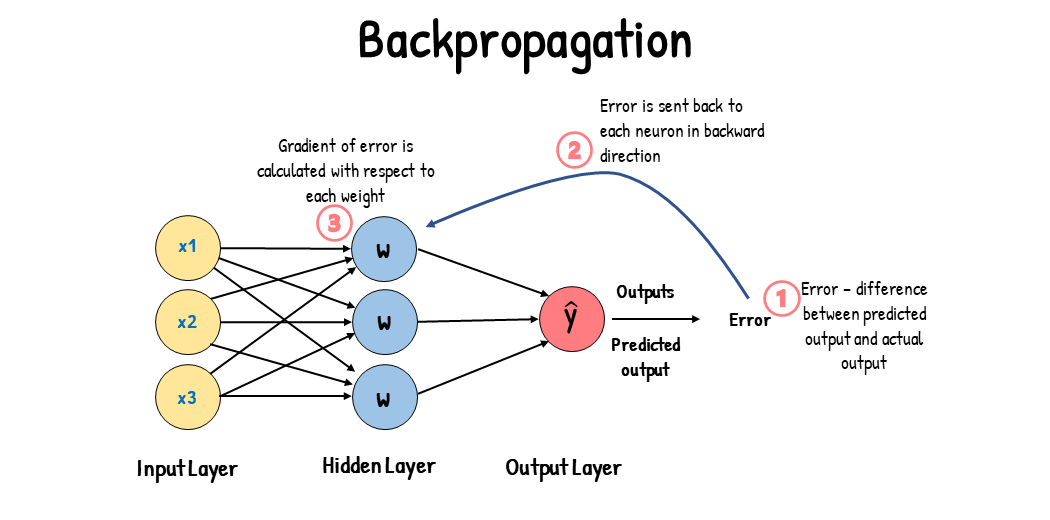
Image courtesy: https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/

4. Weight Updates: Using the gradients from backpropagation, the network adjusts its weights. It updates the weights of the neural network using the gradients computed in the backpropagation step. This is the **gradient descent** step where the weights are adjusted in the direction that reduces the loss. The magnitude and direction of this adjustment are governed by the learning rate.

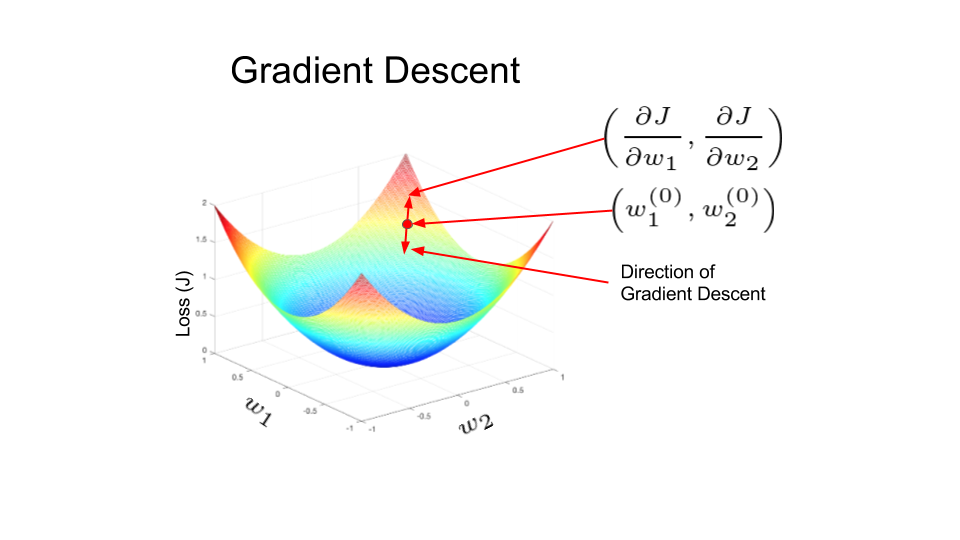

*Image coutesy: https://learnopencv.com/understanding-activation-functions-in-deep-learning/*

**The Role of Learning Rate:**

The learning rate is a pivotal hyperparameter in the training process. Think of it as the step size the network takes during weight updates. A smaller learning rate might make the network learn slowly, taking tiny steps towards optimisation. Conversely, a larger rate might make the network take overly large steps, potentially overshooting the optimal point or even diverging.


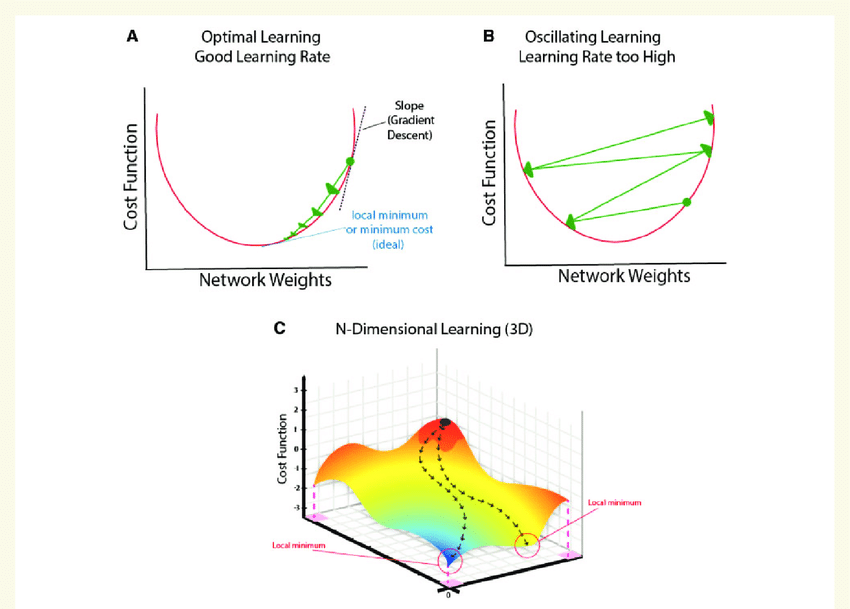

*Krittanawong et al. "Deep learning for cardiovascular medicine: a practical primer." European heart journal 40.25 (2019): 2058-2073.*

**Deep Dive into the Training Function:**

The train_one_batch function encapsulates the essence of the training loop. Here's what it does step-by-step:

1. Batch Retrieval: It fetches a batch of data from the chosen dataset.

2. Prediction Generation: Using the current weights, the network predicts the outputs for the batch.

3. Loss Evaluation: The function compares the network's predictions against the actual targets to compute the loss for the batch.

4. Backpropagation & Weight Update: It then invokes the backpropagation process to compute the gradients and updates the weights accordingly.

This function is central to the training process, and we'll invoke it repeatedly to refine our network's weights. To complement this, we'll also have a test function, allowing us to gauge the performance of our network on unseen data, ensuring that our model is not just memorizing the training data but genuinely learning from it.

In [ ]:
#train the provided network with one batch according to the dataset
#return the loss for the batch

def train_one_batch(nn, dataset, batch_size, lr):
    #Generate the batches
    inputs, targets = 'TODO'
    #forward pass of the network
    preds, H, Z = 'TODO'
    #calculating the loss
    loss = 'TODO'
    dL_dPred = loss_deriv(preds, targets)
    #backpropagation step where the chain rule of calculus is applied to
    #compute how much each weight contributed to the error.
    dL_dW1, dL_dW2 = 'TODO'
    nn.W1 -= lr * dL_dW1
    nn.W2 -= lr * dL_dW2
    return loss

## 1.6. Evaluating the Model

**Purpose of Testing:**

Once a neural network is trained, it's essential to evaluate its performance on data it hasn't seen during training. This process, known as testing or validation, helps ensure that the model isn't just memorizing the training data (a phenomenon called overfitting) but is genuinely learning to generalize from it.


In [ ]:
def test(nn, dataset):
    inputs, targets = generate_batch(dataset, batch_size=200)
    preds, H, Z = 'TODO'
    loss = 'TODO'
    return loss

##1.7. Bringing it all together

With all the methods in place, it's time to integrate them and train our neural network on the XOR dataset. In contrast to our previous tutorial, where we only executed a forward pass, now we'll enable the network to actively learn the task. Previously, the network's outputs were somewhat arbitrary and didn't align well with our expectations. However, in this session, we aim to train the network to produce the desired results, ensuring it performs well even on data it hasn't seen before. Given the importance of each method in achieving this, it's beneficial to have a substantial dataset.

To kick things off, we'll train the network using 5,000 batches, each containing 5 data points. Throughout this process, we'll monitor and document the loss for every batch, allowing us to observe the network's 'learning curve'.

In [ ]:
inputs_xor, targets_xor = generate_batch(dataset_xor, batch_size=100)

chosen_dataset = dataset_xor

batch_size = 5 #number of examples per batch
nbatches = 5000 #number of batches used for training
lr = 0.1 #learning rate

input_size = 'TODO'
hidden_size = 'TODO'
output_size = 'TODO'

nn = nn_one_layer('TODO') #initialise model
preds_xor, _, _ = nn.forward('TODO') #prediction made by model on batch xor input

losses = [] #training losses to record
for i in range(nbatches):
    loss = 'TODO'
    losses.append(loss)

Let's visualise how the network learns the task.

In [ ]:
#plotting the learning curve
plt.plot(np.arange(1, nbatches+1), losses)
plt.xlabel("# batches")
plt.ylabel("training MSE")

## 1.8. Hyperparameter Tuning, Regularization and optimisation

Hyperparameter tuning, regularization, and optimisation are crucial aspects of training neural networks. While the initial values or methods chosen might work, there's often room for improvement. By experimenting and iterating, you can find the best combination that offers optimal performance for your specific task.

**Understanding Hyperparameters:**
Parameters like learning rate, batch size, and number of epochs are not learned from the training process but are set beforehand. A hyperparameter is a parameter whose value is set before the learning process begins. Adjusting them can significantly impact model performance. Read more about this: [Link](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624)

**Regularization:**
Techniques like L1/L2 regularization add a penalty to the loss function, discouraging overly complex models that might overfit. Read more about regularisation, overfitting and underfitting: [Link](https://www.geeksforgeeks.org/regularization-in-machine-learning/)

**Optimisation:**
Advanced optimisation techniques, like Adam or RMSprop, adjust the learning rate during training, often leading to faster convergence. They use the gradients provided by backpropagation to update the model's weights. While all these optimizers utilize the concept of gradient descent, they incorporate additional techniques to improve the convergence speed and stability of the training process. Read more about gradient descent optimisation algorithms: [Link](https://www.ruder.io/optimizing-gradient-descent/)

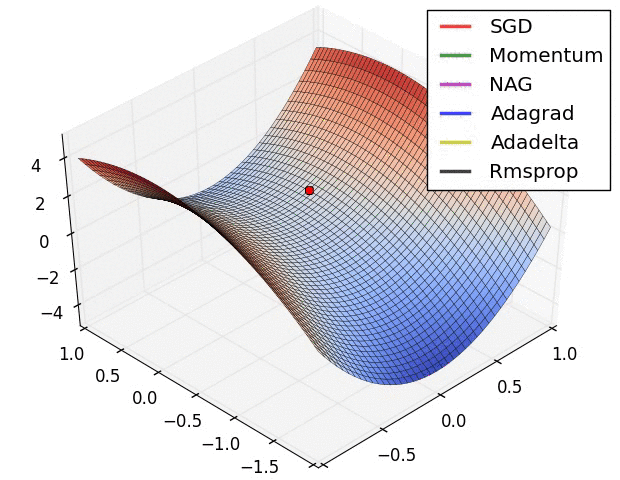

Image courtesy: https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5

#1.9 Exercise

Revisit the prior section, but this time train the network using the AND, OR, and XNOR datasets. Does the network exhibit a preference in learning one dataset over the others?

*Type your answers here*

#2. Learning in the Brain vs. Backpropagation

In this section, we'll juxtapose the backpropagation algorithm against our current understanding of neural learning in the brain. The goal is to discern the extent to which backpropagation, or a variant of it, might be a plausible mechanism for brain-based learning.

What are your thoughts on the plausibility of backpropogation algorithm in the brain?

*Type your answer here*

The question of whether backpropagation can be implemented in the brain is a topic of ongoing debate and research in neuroscience and computational neuroscience. While backpropagation is a powerful algorithm for training artificial neural networks, there are several reasons why its direct implementation in the brain is considered biologically implausible.


What could be the possible reasons?

*Type your answer here:*


1.   *Reason 1*
2.   *Reason 2*
3.   *Reason 3*
4.   *Reason 4*








Further reading: [Link1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7610561/), [Link2](https://www.nature.com/articles/s41583-020-0277-3#:~:text=The%20backpropagation%20algorithm%20learns%20quickly,by%20strict%20formulations%20of%20backpropagation.)

## 2.1 The Weight Transport Problem

The weight transport problem revolves around the conundrum of how 'top-down' backward connections in the brain can mirror the 'bottom-up' feedforward connections with such precision. The multi-layered structure of the brain, with its intricate hierarchy of neurons, offers immense representational power. However, this deep structure also introduces challenges in learning. Specifically, when an error occurs, pinpointing the neurons responsible becomes a complex task.

In the realm of machine learning, the backpropagation algorithm tackles this by distributing the error. It does so by multiplying the error signals with the synaptic weights associated with each neuron's axon and those further downstream. This method, however, presupposes a highly specific and symmetric backward connectivity pattern, a feature that many believe is unattainable in the brain.

To delve deeper into this, let's modify the backpropagation algorithm. What if the backward weights were randomized and remained constant? What implications would this have on learning? Note that this method as called as **feedback alignment.**

In [ ]:
#fixed, random feedback weights
W1_feedback = np.random.randn(input_size, hidden_size)
W2_feedback = np.random.randn(hidden_size, output_size)

def train_one_batch_fixed_feedback(nn, dataset, batch_size, lr):
    inputs, targets = generate_batch(dataset, batch_size)
    preds, H, Z = nn.forward(inputs)

    loss = loss_mse(preds, targets)

    dL_dPred = loss_deriv(preds, targets)
    dL_dW1, dL_dW2 = 'TODO' #the changed line

    nn.W1 -= lr * dL_dW1
    nn.W2 -= lr * dL_dW2

    return loss

In [ ]:
seed = 1

#Fixed feedback weights
np.random.seed(seed)
nn = nn_one_layer(input_size, hidden_size, output_size) #initialise (untrained) model

chosen_dataset = dataset_xor

batch_size = 5 #number of examples per batch
nbatches = 5000 #number of batches used for training
lr = 0.1 #learning rate

losses = [] #training losses to record
for i in range(nbatches):
    loss = 'TODO'
    losses.append(loss)

h2=plt.plot(np.arange(1, nbatches+1), losses, label="Fixed feedback weights")

plt.xlabel("# batches")
plt.ylabel("training MSE")

#----------------------------------------------------------------------------------------------

#Normal Backpropogation
np.random.seed(seed)
nn = nn_one_layer(input_size, hidden_size, output_size) #initialise (untrained) model

chosen_dataset = dataset_xor

losses = [] #training losses to record
for i in range(nbatches):
    loss = 'TODO'
    losses.append(loss)

h1=plt.plot(np.arange(1, nbatches+1), losses, label="Normal backprop")
plt.legend()
plt.xlabel("# batches")
plt.ylabel("training MSE")
plt.title("Normal backprop vs fixed feedback weights")

What are your inferences regarding the learning curves?

*Type your answers here*


*   Noise and Oscillations: The learning curve might appear noisier with feedback alignment. This is because the error signals derived from random backward weights can introduce more variability into the weight updates. This noise can sometimes be beneficial (acting as a form of regularization), but it can also lead to oscillations in the learning curve.

*   Convergence to Useful Representations: Despite the initial slowdown, the network can still learn. Over time, the feedforward weights adjust in such a way that they become compatible with the fixed, random backward weights. This means that the network finds a way to interpret the error signals effectively, even if they're not the "true" gradients.

*   Generalization and Robustness: Some studies have suggested that networks trained with feedback alignment might generalize better in certain scenarios. The hypothesis is that the noise introduced by the random backward weights acts as a form of regularization.
However, this doesn't mean feedback alignment is universally superior. Its effectiveness can vary based on the specific task, network architecture, and other factors.
*   Training Stability: Feedback alignment can introduce more variability into the training process. Depending on the initialization of the forward weights and the choice of random backward weights, training might be more unstable or require more careful hyperparameter tuning.
*   Complexity and Depth Challenges: For simpler tasks and shallower networks, feedback alignment can work surprisingly well. However, as the network's depth increases or the task complexity grows, feedback alignment might face challenges. The compounded effect of using random weights in the backward pass over many layers can make learning more difficult.

While traditional backpropagation with weight transposition is the most common and often the most efficient method for training neural networks, feedback alignment demonstrates that **precise alignment between forward and backward weights is not strictly necessary for learning**. This discovery has implications for both the design of artificial neural networks and our understanding of learning in biological neural systems.

Further reading: [Link](https://towardsdatascience.com/feedback-alignment-methods-7e6c41446e36)


## 2.2 Two phase learning


The backpropogation algorithm is divided into two phases: the forward phase (where the input is propogated up the network to form an output) and the backward phase (where the error signal propogated backwards and weights are adjusted accordingly). An artificial neural network performs each phase alternatively; they do not happen at the same time! Is this a realistic constraint of the brain? Could backpropogation still be implemented with both phases occuring simultaneously? If you're particularly interested in this, a potential solution to this issue is offered in [Sacramento et al.](http://papers.neurips.cc/paper/8089-dendritic-cortical-microcircuits-approximate-the-backpropagation-algorithm.pdf) as discussed in the lectures.

In [ ]:
#Here we are simply making the backward pass random, which means that it will sometimes be used and sometimes dont.
#Making it a bit more like in the brain, which is highly stochastic

seed = 1
batch_size = 5 #number of examples per batch
nbatches = 5000 #number of batches used for training
lr = 0.1 #learning rate


def backprop(W1, W2, dL_dPred, U, H, Z):
    #hints: for dL_dW1 compute dL_dH, dL_dZ first.
    #for transpose of numpy array A use A.T
    #for element-wise multiplication use A*B or np.multiply(A,B)

    dL_dW2 = np.matmul(H.T, dL_dPred)

    #NOTE: We are not doing backprop prob_not_backprop% of the time (try 0.8 (80%) or 0.2 (20%))
    prob_not_backprop = 0.8
    if np.random.uniform()>prob_not_backprop:
        dL_dH = np.matmul(dL_dPred, W2.T)
        dL_dZ = np.multiply(sigmoid_prime(Z), dL_dH)
        dL_dW1 = np.matmul(U.T, dL_dZ)
    else:
        dL_dH = 1
        dL_dZ = dL_dH
        dL_dW1 = U.T


    return dL_dW1, dL_dW2


#Fixed feedback weights
np.random.seed(seed)
nn = nn_one_layer(input_size, hidden_size, output_size) #initialise (untrained) model

chosen_dataset = dataset_xor

#batch_size = 5 #number of examples per batch
#nbatches = 5000 #number of batches used for training
#lr = 0.05 #learning rate

losses = [] #training losses to record
for i in range(nbatches):
    loss = train_one_batch(nn, chosen_dataset, batch_size=batch_size, lr=lr)
    losses.append(loss)

h2=plt.plot(np.arange(1, nbatches+1), losses, label="Random 2nd phase")
plt.xlabel("# batches")
plt.ylabel("training MSE")
#plt.title("Fixed feedback weights")


def backprop(W1, W2, dL_dPred, U, H, Z):
    #hints: for dL_dW1 compute dL_dH, dL_dZ first.
    #for transpose of numpy array A use A.T
    #for element-wise multiplication use A*B or np.multiply(A,B)

    dL_dW2 = np.matmul(H.T, dL_dPred)
    dL_dH = np.matmul(dL_dPred, W2.T)
    dL_dZ = np.multiply(sigmoid_prime(Z), dL_dH)
    dL_dW1 = np.matmul(U.T, dL_dZ)

    return dL_dW1, dL_dW2


np.random.seed(seed)
nn = nn_one_layer(input_size, hidden_size, output_size) #initialise (untrained) model

chosen_dataset = dataset_xor



losses = [] #training losses to record
for i in range(nbatches):
    loss = train_one_batch(nn, chosen_dataset, batch_size=batch_size, lr=lr)
    losses.append(loss)

h1=plt.plot(np.arange(1, nbatches+1), losses, label="Normal backprop")
plt.legend()
plt.xlabel("# batches")
plt.ylabel("training MSE")
plt.title("Normal backprop vs without derivative")




## Summing up
While the traditional backpropagation algorithm as used in artificial neural networks might not be directly implemented in the brain, the core idea of adjusting based on errors might still hold in some form. The exact mechanisms of learning in the brain remain an active area of research.

# 3. Getting introduced to machine learning libraries

**Benefits of Machine Learning Libraries:**

Libraries like PyTorch handle many complexities behind the scenes, allowing for more concise and efficient code.

**Revisiting Previous Concepts with PyTorch:**

Let us implement the same neural network, loss function, and training loop using PyTorch. Notice the reduced code complexity and built-in functionalities.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

dataset_and = list(zip(data, labels))


# Generate batch
def generate_batch(dataset, batch_size):
    inputs = torch.stack([ex[0] for ex in dataset])
    targets = torch.stack([ex[1] for ex in dataset])
    rand_inds = torch.randint(0, len(dataset), (batch_size,))
    inputs_batch = inputs[rand_inds]
    targets_batch = targets[rand_inds]
    return inputs_batch, targets_batch

# Define the neural network
class NN_OneLayer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN_OneLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = 'TODO'
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z = 'TODO'
        h = 'TODO'
        v = 'TODO'
        return v, h, z

# Training parameters
chosen_dataset = dataset_and
batch_size = 5
nbatches = 5000
lr = 0.1
input_size = 2
hidden_size = 5
output_size = 1

# Initialise model and optimiser
model = NN_OneLayer(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimiser = optim.SGD(model.parameters(), lr=lr)

# Training loop
losses = []
for i in range(nbatches):
    inputs, targets = generate_batch(chosen_dataset, batch_size)
    optimiser.zero_grad()
    outputs, _, _ = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimiser.step()
    losses.append(loss.item())

# Plotting the loss
plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()
